# Analisi esplorativa dei dati

Progetto di analisi esplorativa su un dataset di vendite e-commerce.


## 1. Introduzione

Questo progetto ha l’obiettivo di analizzare un dataset di transazioni di un e-commerce per comprendere l’andamento delle vendite, identificare pattern principali e valutare la qualità dei dati disponibili.

## 2. Descrizione del dataset

In [4]:
import pandas as pd

df = pd.read_csv("data/basket_details.csv")
df.head()

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2


In [ ]:
df.shape #numero di righe e colonne

(15000, 4)

In [6]:
df.columns

Index(['customer_id', 'product_id', 'basket_date', 'basket_count'], dtype='str')

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   customer_id   15000 non-null  int64
 1   product_id    15000 non-null  int64
 2   basket_date   15000 non-null  str  
 3   basket_count  15000 non-null  int64
dtypes: int64(3), str(1)
memory usage: 468.9 KB


In [8]:
df.describe()

,customer_id,product_id,basket_count
count,1.500000e+04,1.500000e+04,15000.000000
mean,1.808567e+07,3.269771e+07,2.153733
std,1.233000e+07,1.629455e+07,0.517929
min,4.784000e+03,4.939000e+04,2.000000
25%,8.659327e+06,3.137412e+07,2.000000
50%,1.520775e+07,3.694759e+07,2.000000
75%,2.663904e+07,4.502408e+07,2.000000
max,4.460824e+07,5.579097e+07,10.000000


Il dataset contiene informazioni sulle transazioni di vendita, inclusi dettagli sui prodotti e le quantità. In questa fase iniziale vengono analizzate dimensioni, tipologia delle variabili e statistiche descrittive principali.

In [ ]:
df.isnull().sum() #Controllo valori mancanti

customer_id     0
product_id      0
basket_date     0
basket_count    0
dtype: int64

In [ ]:
df.duplicated().sum() #Controllo duplicati

np.int64(0)

In [11]:
df.describe(include="all") #Controllo valori anomali

,customer_id,product_id,basket_date,basket_count
count,1.500000e+04,1.500000e+04,15000,15000.000000
unique,NaN,NaN,31,NaN
top,NaN,NaN,2019-05-27,NaN
freq,NaN,NaN,1617,NaN
mean,1.808567e+07,3.269771e+07,NaN,2.153733
std,1.233000e+07,1.629455e+07,NaN,0.517929
min,4.784000e+03,4.939000e+04,NaN,2.000000
25%,8.659327e+06,3.137412e+07,NaN,2.000000
50%,1.520775e+07,3.694759e+07,NaN,2.000000
75%,2.663904e+07,4.502408e+07,NaN,2.000000


Ho effettuato controlli preliminari per individuare valori mancanti, duplicati e possibili anomalie nei dati, al fine di valutare la qualità complessiva del dataset.
Ho riscontrato che il dataset non ha nessun dato mancante, nessun duplicato e tutti i valori sembrano ragionevoli e inoltre, ho notato che la colonna "basket_count" ha pochi valori alti che possono però essere considerati come outlier naturali e non quindi come errori. L'unica anomalia da valutare è che la colonna "basket_date" è di tipo stringa e quindi sarebbe meglio convertirla in datetime per eventuali analisi temporali. 

## 3. Pulizia dei dati

In [ ]:
df['basket_date'] = pd.to_datetime(df['basket_date'])
df['basket_date'].dtype


dtype('<M8[us]')

Come abbiamo visto, non ci sono particolari pulizie da effettuare sui dati, quindi mi sono limitata a convertire il tipo di dato per garantire coerenza nelle analisi successive. 

## 4. Analisi esplorativa 

In [ ]:
df["basket_count"].sum() #Num tot di articoli venduti

np.int64(32306)

In [ ]:
df["basket_count"].mean() #Num medio articoli per transazione

15000

In [ ]:
top_products = ( #Prodotti più venduti
    df.groupby("product_id")["basket_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products

product_id
43524799    69
31516269    59
39833031    50
46130148    36
34913531    28
3735903     27
40276011    27
6411072     23
42033035    23
39050110    22
Name: basket_count, dtype: int64

In [ ]:
top_customers = ( #Clienti più attivi
    df.groupby("customer_id")["basket_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers

customer_id
8276934     29
7097820     18
11082470    17
22988999    14
18617678    14
10871751    14
11732494    14
16074697    13
29145357    12
25854510    12
Name: basket_count, dtype: int64

In [16]:
monthly_volume = ( #Analisi temporale mese
    df.groupby(df["basket_date"].dt.to_period("M"))["basket_count"]
    .sum()
)
monthly_volume

basket_date
2019-05    19209
2019-06    13097
Freq: M, Name: basket_count, dtype: int64

L’analisi esplorativa mostra la distribuzione dei volumi di vendita, con particolare attenzione ai prodotti più acquistati, ai clienti più attivi e all’andamento temporale degli acquisti.
Poiché il dataset non include informazioni sui prezzi, l’analisi si concentra esclusivamente sui volumi.

## 5. Visualizzazione dei risultati

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv("data/basket_details.csv")
df.head()



,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2


In [12]:
df["basket_date"] = pd.to_datetime(df["basket_date"])

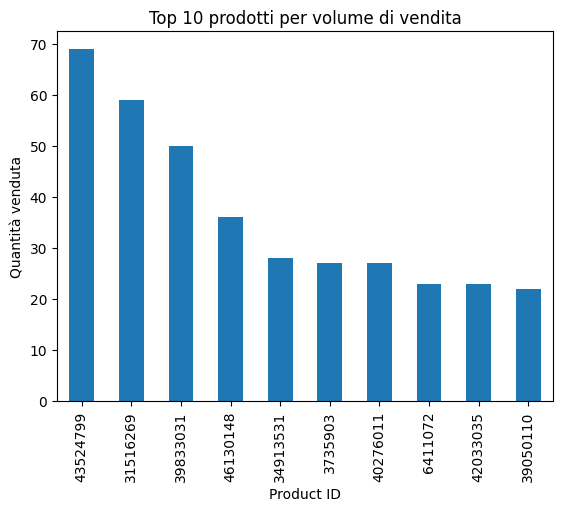

In [17]:
top_products.plot(kind="bar")
plt.title("Top 10 prodotti per volume di vendita")
plt.xlabel("Product ID")
plt.ylabel("Quantità venduta")
plt.show()

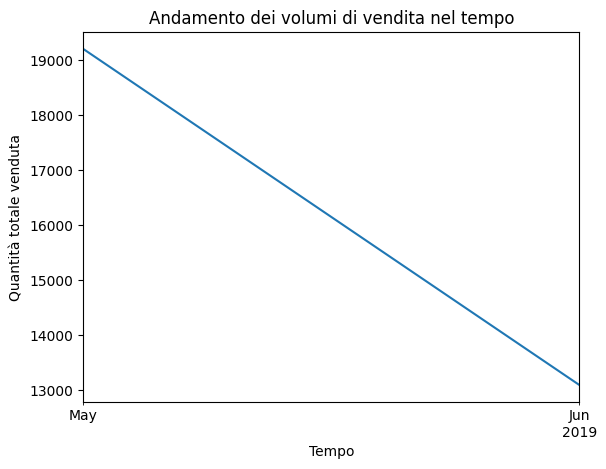

In [19]:
monthly_volume.plot() 
plt.title("Andamento dei volumi di vendita nel tempo")
plt.xlabel("Tempo")
plt.ylabel("Quantità totale venduta")
plt.show()

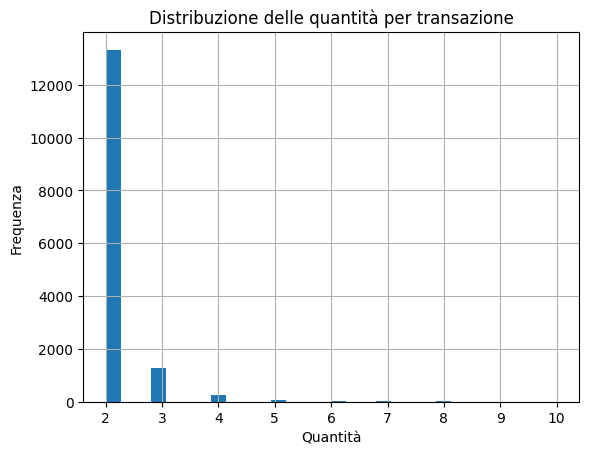

In [5]:
df["basket_count"].hist(bins=30) #Distribuzione dei volumi
plt.title("Distribuzione delle quantità per transazione")
plt.xlabel("Quantità")
plt.ylabel("Frequenza")
plt.show()

## 6. Conclusioni

Al termine di questa analisi sul dataset e-commerce, emergono alcuni punti interessanti. Anche se non abbiamo a disposizione i prezzi, i volumi di vendita ci dicono molto su come acquistano i clienti.

Il dato più particolare è che ogni transazione contiene in media circa 2.15 articoli. Considerando che il valore minimo registrato è 2, è chiaro che non siamo di fronte a un classico acquisto al dettaglio dove spesso si compra un singolo pezzo. Questo fa pensare a vendite all'ingrosso o a un sistema di dati che aggrega già i prodotti.

Il dataset è molto "pulito": non ci sono valori mancanti o duplicati. Gli unici valori fuori scala (outlier) nella quantità di articoli sembrano essere acquisti reali di clienti molto attivi piuttosto che errori di inserimento.

Ho identificato con precisione quali sono i 10 prodotti più venduti e chi sono i clienti "top". Inoltre, l'analisi temporale mostra come il volume d'affari sia distribuito tra maggio e giugno 2019.

In conclusione, il progetto dimostra che anche solo analizzando le quantità e le date si può ottenere un profilo chiaro delle abitudini d'acquisto e della struttura del business.